## watermark training

In [42]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
print("PyTorch Version: ",torch.__version__)
print("Torchvision Version: ",torchvision.__version__)
from PIL import Image
import pandas as pd
import random
from tqdm import tqdm
import timm

import sys
sys.path.append('../')
from watermarkmodel.model.convnext import convnext_tiny
from watermarkmodel.model.dataset import WatermarkDataset
from watermarkmodel.model.preprocess import RandomRotation
from watermarkmodel.model.train import train_model

input_size = 256

PyTorch Version:  2.2.2
Torchvision Version:  0.17.2


**ConvNext**

In [43]:
from watermarkmodel.model.convnext import convnext_tiny

model_ft = convnext_tiny(pretrained=True, in_22k=True, num_classes=21841)

model_ft.head = nn.Sequential( 
    nn.Linear(in_features=768, out_features=512),
    nn.GELU(),
    nn.Linear(in_features=512, out_features=256),
    nn.GELU(),
    nn.Linear(in_features=256, out_features=2),
)

**Preprocessing**

- Device Setting

In [4]:
#using cpu when gpu is not available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_ft = model_ft.to(device)

- Dataset Preparation

In [44]:
from watermarkmodel.model.preprocess import Preprocessing
import pandas as pd

#read dataset
df_train = pd.read_csv('../dataset/train_data_v1.csv')
df_val = pd.read_csv('../dataset/val_data_v1.csv')

datasets = Preprocessing(df_train, df_val)
datasets

{'train': <watermarkmodel.model.dataset.WatermarkDataset at 0x124c9ce50>,
 'val': <watermarkmodel.model.dataset.WatermarkDataset at 0x124c9cac0>}

**Data Training**

In [45]:
def train_model_hyperparameter(df_train, df_val, batch, lrate, epoch):
    datasets = Preprocessing(df_train, df_val)

    model_ft = convnext_tiny(pretrained=True, in_22k=True, num_classes=21841)
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    #config
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = optim.AdamW(params=model_ft.parameters(), lr=lrate)
    dataloaders_dict = {
        x: torch.utils.data.DataLoader(datasets[x], batch_size=BATCH_SIZE, shuffle=True, num_workers=0) #to prevent runtimeerror on non gpu device
        for x in ['train', 'val']
    }

    #train
    model_ft.head = nn.Sequential( 
        nn.Linear(in_features=768, out_features=512),
        nn.GELU(),
        nn.Linear(in_features=512, out_features=256),
        nn.GELU(),
        nn.Linear(in_features=256, out_features=2),
    )

    model_ft, train_acc_history, val_acc_history = train_model(
        model_ft, dataloaders_dict, criterion, optimizer, num_epochs=epoch
    )

    #save model
    #filename = 'watermark_model.pkl'
    return model_ft, train_acc_history, val_acc_history

**training with provided data**

* convnext-tiny_batch8_lr01e-3_epoch10

Epoch 0/9
----------


100%|██████████| 14/14 [01:02<00:00,  4.47s/it]


train Loss: 0.6443 Acc: 0.7054


100%|██████████| 2/2 [00:01<00:00,  1.35it/s]


val Loss: 0.6072 Acc: 0.7143

Epoch 1/9
----------


100%|██████████| 14/14 [00:52<00:00,  3.78s/it]


train Loss: 0.5361 Acc: 0.7054


100%|██████████| 2/2 [00:01<00:00,  1.23it/s]


val Loss: 0.5252 Acc: 0.7143

Epoch 2/9
----------


100%|██████████| 14/14 [01:01<00:00,  4.40s/it]


train Loss: 0.4086 Acc: 0.7054


100%|██████████| 2/2 [00:01<00:00,  1.23it/s]


val Loss: 0.4569 Acc: 0.7143

Epoch 3/9
----------


100%|██████████| 14/14 [01:26<00:00,  6.18s/it]


train Loss: 0.3128 Acc: 0.8929


100%|██████████| 2/2 [00:01<00:00,  1.24it/s]


val Loss: 0.4168 Acc: 0.7857

Epoch 4/9
----------


100%|██████████| 14/14 [01:07<00:00,  4.81s/it]


train Loss: 0.2592 Acc: 0.9554


100%|██████████| 2/2 [00:01<00:00,  1.08it/s]


val Loss: 0.3094 Acc: 0.8571

Epoch 5/9
----------


100%|██████████| 14/14 [01:09<00:00,  4.97s/it]


train Loss: 0.2355 Acc: 0.9732


100%|██████████| 2/2 [00:03<00:00,  1.56s/it]


val Loss: 0.2690 Acc: 0.9286

Epoch 6/9
----------


100%|██████████| 14/14 [01:00<00:00,  4.33s/it]


train Loss: 0.1637 Acc: 0.9911


100%|██████████| 2/2 [00:01<00:00,  1.33it/s]


val Loss: 0.2835 Acc: 0.9286

Epoch 7/9
----------


100%|██████████| 14/14 [00:56<00:00,  4.05s/it]


train Loss: 0.1254 Acc: 0.9732


100%|██████████| 2/2 [00:01<00:00,  1.19it/s]


val Loss: 0.3056 Acc: 0.8571

Epoch 8/9
----------


100%|██████████| 14/14 [01:00<00:00,  4.33s/it]


train Loss: 0.0931 Acc: 1.0000


100%|██████████| 2/2 [00:01<00:00,  1.23it/s]


val Loss: 0.3367 Acc: 0.8571

Epoch 9/9
----------


100%|██████████| 14/14 [00:53<00:00,  3.84s/it]


train Loss: 0.0814 Acc: 1.0000


100%|██████████| 2/2 [00:01<00:00,  1.29it/s]


val Loss: 0.3192 Acc: 0.8571

Training complete in 10m 50s
Best val Acc: 0.928571


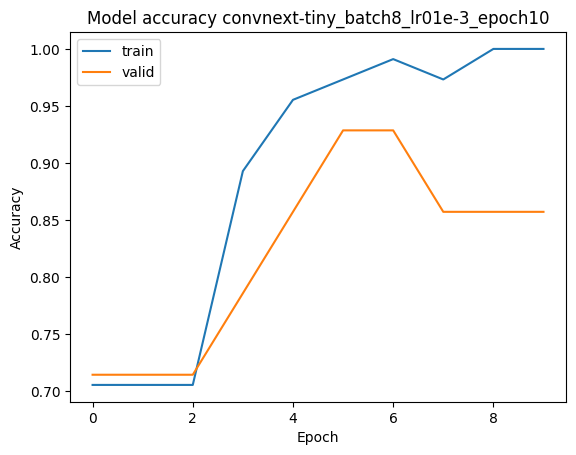

In [46]:
model1, train_acc1, val_acc1 = train_model_hyperparameter(df_train, df_val, 8, 0.1e-3, 10)
#torch.save(model_ft.state_dict(), '../watermarkmodel/model/weights/convnext-tiny_watermarks_detector_datav1_batch8_lr02e-5_epoch10.pth')
plt.plot([i.cpu().item() for i in train_acc1])
plt.plot([i.cpu().item() for i in val_acc1])
plt.title('Model accuracy convnext-tiny_batch8_lr01e-3_epoch10')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [75]:
print('training accuracy:', torch.mean(torch.tensor(train_acc1)))
print('validation accuracy:', torch.mean(torch.tensor(val_acc1)))

training accuracy: tensor(0.8902, dtype=torch.float64)
validation accuracy: tensor(0.8214, dtype=torch.float64)


* convnext-tiny_batch16_lr01e-3_epoch10

In [77]:
model2, train_acc2, val_acc2 = train_model_hyperparameter(df_train, df_val, 16, 0.1e-3, 10)
print('training accuracy:', torch.mean(torch.tensor(train_acc2)))
print('validation accuracy:', torch.mean(torch.tensor(val_acc2)))
#torch.save(model_ft.state_dict(), '../watermarkmodel/model/weights/convnext-tiny_watermarks_detector_datav1_batch8_lr02e-5_epoch10.pth')
plt.plot([i.cpu().item() for i in train_acc2])
plt.plot([i.cpu().item() for i in val_acc2])
plt.title('Model accuracy convnext-tiny_batch16_lr01e-3_epoch10')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

Epoch 0/9
----------


100%|██████████| 14/14 [00:59<00:00,  4.22s/it]


train Loss: 0.6393 Acc: 0.6964


100%|██████████| 2/2 [00:01<00:00,  1.26it/s]


val Loss: 0.5548 Acc: 0.7143

Epoch 1/9
----------


 14%|█▍        | 2/14 [00:08<00:49,  4.11s/it]

* pretrained_batch8_lr02e-5_epoch10

Epoch 0/9
----------


100%|██████████| 14/14 [02:13<00:00,  9.55s/it]


train Loss: 0.6991 Acc: 0.3571


100%|██████████| 2/2 [00:02<00:00,  1.33s/it]


val Loss: 0.7000 Acc: 0.3571

Epoch 1/9
----------


100%|██████████| 14/14 [02:21<00:00, 10.11s/it]


train Loss: 0.6924 Acc: 0.5179


100%|██████████| 2/2 [00:02<00:00,  1.49s/it]


val Loss: 0.6951 Acc: 0.4286

Epoch 2/9
----------


100%|██████████| 14/14 [02:53<00:00, 12.38s/it]


train Loss: 0.6865 Acc: 0.6518


100%|██████████| 2/2 [00:05<00:00,  2.89s/it]


val Loss: 0.6906 Acc: 0.5000

Epoch 3/9
----------


100%|██████████| 14/14 [06:22<00:00, 27.35s/it]


train Loss: 0.6823 Acc: 0.6607


100%|██████████| 2/2 [00:06<00:00,  3.40s/it]


val Loss: 0.6859 Acc: 0.5714

Epoch 4/9
----------


100%|██████████| 14/14 [04:36<00:00, 19.72s/it]


train Loss: 0.6770 Acc: 0.7054


100%|██████████| 2/2 [00:04<00:00,  2.50s/it]


val Loss: 0.6812 Acc: 0.5714

Epoch 5/9
----------


100%|██████████| 14/14 [05:40<00:00, 24.30s/it]


train Loss: 0.6721 Acc: 0.7054


100%|██████████| 2/2 [00:05<00:00,  2.85s/it]


val Loss: 0.6765 Acc: 0.7143

Epoch 6/9
----------


100%|██████████| 14/14 [05:26<00:00, 23.30s/it]


train Loss: 0.6691 Acc: 0.7054


100%|██████████| 2/2 [00:04<00:00,  2.32s/it]


val Loss: 0.6713 Acc: 0.7143

Epoch 7/9
----------


100%|██████████| 14/14 [05:53<00:00, 25.24s/it]


train Loss: 0.6609 Acc: 0.7054


100%|██████████| 2/2 [00:06<00:00,  3.35s/it]


val Loss: 0.6661 Acc: 0.7143

Epoch 8/9
----------


100%|██████████| 14/14 [07:05<00:00, 30.38s/it]


train Loss: 0.6554 Acc: 0.7054


100%|██████████| 2/2 [00:03<00:00,  1.70s/it]


val Loss: 0.6609 Acc: 0.7143

Epoch 9/9
----------


100%|██████████| 14/14 [03:17<00:00, 14.08s/it]


train Loss: 0.6491 Acc: 0.7054


100%|██████████| 2/2 [00:05<00:00,  2.76s/it]


val Loss: 0.6554 Acc: 0.7143

Training complete in 46m 40s
Best val Acc: 0.714286


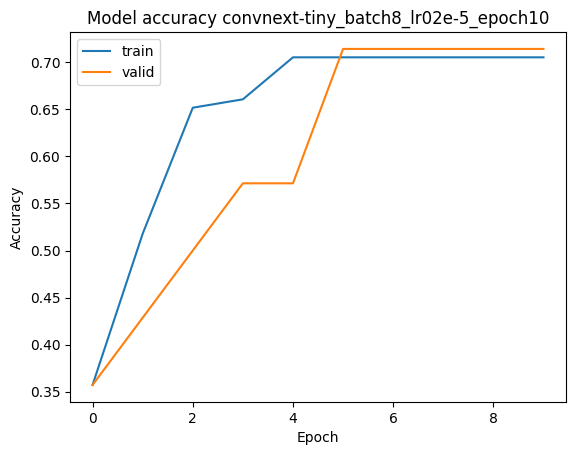

In [4]:
import warnings
warnings.filterwarnings("ignore")
from watermarkmodel.model.convnext import convnext_tiny
from watermarkmodel.model.train import train_model

model_ft = convnext_tiny(pretrained=True, in_22k=True, num_classes=21841)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

#config
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.AdamW(params=model_ft.parameters(), lr=0.2e-5)
BATCH_SIZE = 8
dataloaders_dict = {
    x: torch.utils.data.DataLoader(datasets[x], batch_size=BATCH_SIZE, shuffle=True, num_workers=0) #to prevent runtimeerror on non gpu device
    for x in ['train', 'val']
}

#train
model_ft.head = nn.Sequential( 
    nn.Linear(in_features=768, out_features=512),
    nn.GELU(),
    nn.Linear(in_features=512, out_features=256),
    nn.GELU(),
    nn.Linear(in_features=256, out_features=2),
)

model_ft, train_acc_history, val_acc_history = train_model(
    model_ft, dataloaders_dict, criterion, optimizer, num_epochs=10
)

#torch.save(model_ft.state_dict(), '../watermarkmodel/model/weights/convnext-tiny_watermarks_detector_datav1_batch8_lr02e-5_epoch10.pth')
plt.plot([i.cpu().item() for i in train_acc_history])
plt.plot([i.cpu().item() for i in val_acc_history])
plt.title('Model accuracy convnext-tiny_batch8_lr02e-5_epoch10')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

* pretrained_batch16_lr02e-5_epoch10

In [9]:
import warnings
warnings.filterwarnings("ignore")
from watermarkmodel.model.convnext import convnext_tiny

model_ft = convnext_tiny(pretrained=True, in_22k=True, num_classes=21841)

#config
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.AdamW(params=model_ft.parameters(), lr=0.2e-5)
BATCH_SIZE = 16
dataloaders_dict = {
    x: torch.utils.data.DataLoader(datasets[x], batch_size=BATCH_SIZE, shuffle=True, num_workers=0) #to prevent runtimeerror on non gpu device
    for x in ['train', 'val']
    }

#train
model_ft.head = nn.Sequential( 
    nn.Linear(in_features=768, out_features=512),
    nn.GELU(),
    nn.Linear(in_features=512, out_features=256),
    nn.GELU(),
    nn.Linear(in_features=256, out_features=2),
)

model_ft, train_acc_history, val_acc_history = train_model(
    model_ft, dataloaders_dict, criterion, optimizer, num_epochs=10
)

#torch.save(model_ft.state_dict(), '../watermarkmodel/model/weights/convnext-tiny_watermarks_detector_datav1_batch16_lr02e-5_epoch10.pth')
plt.plot([i.cpu().item() for i in train_acc_history])
plt.plot([i.cpu().item() for i in val_acc_history])
plt.title('Model accuracy convnext-tiny_batch16_lr02e-5_epoch10')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

Epoch 0/9
----------


100%|██████████| 7/7 [00:44<00:00,  6.31s/it]


train Loss: 0.6850 Acc: 0.6339


100%|██████████| 1/1 [00:01<00:00,  1.24s/it]


val Loss: 0.6820 Acc: 0.6429

Epoch 1/9
----------


100%|██████████| 7/7 [00:41<00:00,  5.90s/it]


train Loss: 0.6801 Acc: 0.7143


100%|██████████| 1/1 [00:01<00:00,  1.26s/it]


val Loss: 0.6801 Acc: 0.6429

Epoch 2/9
----------


100%|██████████| 7/7 [00:41<00:00,  5.96s/it]


train Loss: 0.6775 Acc: 0.7232


100%|██████████| 1/1 [00:01<00:00,  1.21s/it]


val Loss: 0.6781 Acc: 0.6429

Epoch 3/9
----------


100%|██████████| 7/7 [00:41<00:00,  5.94s/it]


train Loss: 0.6749 Acc: 0.7411


100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


val Loss: 0.6761 Acc: 0.6429

Epoch 4/9
----------


100%|██████████| 7/7 [00:43<00:00,  6.23s/it]


train Loss: 0.6698 Acc: 0.7321


100%|██████████| 1/1 [00:01<00:00,  1.42s/it]


val Loss: 0.6743 Acc: 0.6429

Epoch 5/9
----------


100%|██████████| 7/7 [00:45<00:00,  6.50s/it]


train Loss: 0.6684 Acc: 0.7232


100%|██████████| 1/1 [00:01<00:00,  1.47s/it]


val Loss: 0.6725 Acc: 0.6429

Epoch 6/9
----------


100%|██████████| 7/7 [00:43<00:00,  6.23s/it]


train Loss: 0.6661 Acc: 0.7232


100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


val Loss: 0.6706 Acc: 0.6429

Epoch 7/9
----------


100%|██████████| 7/7 [00:42<00:00,  6.11s/it]


train Loss: 0.6616 Acc: 0.7232


100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


val Loss: 0.6688 Acc: 0.6429

Epoch 8/9
----------


100%|██████████| 7/7 [00:43<00:00,  6.22s/it]


train Loss: 0.6578 Acc: 0.7232


100%|██████████| 1/1 [00:01<00:00,  1.35s/it]


val Loss: 0.6671 Acc: 0.6429

Epoch 9/9
----------


100%|██████████| 7/7 [00:45<00:00,  6.48s/it]


train Loss: 0.6549 Acc: 0.7232


100%|██████████| 1/1 [00:01<00:00,  1.35s/it]

val Loss: 0.6654 Acc: 0.6429

Training complete in 7m 26s
Best val Acc: 0.642857


* pretrained_batch32_lr02e-5_epoch10

In [11]:
import warnings
warnings.filterwarnings("ignore")
from watermarkmodel.model.convnext import convnext_tiny

model_ft = convnext_tiny(pretrained=True, in_22k=True, num_classes=21841)

#config
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.AdamW(params=model_ft.parameters(), lr=0.2e-5)
BATCH_SIZE = 32
dataloaders_dict = {
    x: torch.utils.data.DataLoader(datasets[x], batch_size=BATCH_SIZE, shuffle=True, num_workers=0) #to prevent runtimeerror on non gpu device
    for x in ['train', 'val']
    }

#train
model_ft.head = nn.Sequential( 
    nn.Linear(in_features=768, out_features=512),
    nn.GELU(),
    nn.Linear(in_features=512, out_features=256),
    nn.GELU(),
    nn.Linear(in_features=256, out_features=2),
)

model_ft, train_acc_history, val_acc_history = train_model(
    model_ft, dataloaders_dict, criterion, optimizer, num_epochs=10
)

#torch.save(model_ft.state_dict(), '../watermarkmodel/model/weights/convnext-tiny_watermarks_detector_datav1_batch32_lr02e-5_epoch10.pth')
plt.plot([i.cpu().item() for i in train_acc_history])
plt.plot([i.cpu().item() for i in val_acc_history])
plt.title('Model accuracy convnext-tiny_batch32_lr02e-5_epoch10')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

Epoch 0/9
----------


100%|██████████| 4/4 [01:35<00:00, 23.79s/it]


train Loss: 0.7055 Acc: 0.2589


100%|██████████| 1/1 [00:01<00:00,  1.72s/it]


val Loss: 0.7039 Acc: 0.2143

Epoch 1/9
----------


100%|██████████| 4/4 [01:23<00:00, 20.83s/it]


train Loss: 0.7033 Acc: 0.2946


100%|██████████| 1/1 [00:02<00:00,  2.12s/it]


val Loss: 0.7025 Acc: 0.2857

Epoch 2/9
----------


100%|██████████| 4/4 [01:32<00:00, 23.22s/it]


train Loss: 0.7010 Acc: 0.3214


100%|██████████| 1/1 [00:01<00:00,  1.74s/it]


val Loss: 0.7010 Acc: 0.2857

Epoch 3/9
----------


100%|██████████| 4/4 [01:32<00:00, 23.24s/it]


train Loss: 0.6980 Acc: 0.4554


100%|██████████| 1/1 [00:01<00:00,  1.76s/it]


val Loss: 0.6995 Acc: 0.5000

Epoch 4/9
----------


100%|██████████| 4/4 [01:20<00:00, 20.04s/it]


train Loss: 0.6952 Acc: 0.5000


100%|██████████| 1/1 [00:01<00:00,  1.67s/it]


val Loss: 0.6980 Acc: 0.5000

Epoch 5/9
----------


100%|██████████| 4/4 [01:17<00:00, 19.27s/it]


train Loss: 0.6941 Acc: 0.4821


100%|██████████| 1/1 [00:01<00:00,  1.65s/it]


val Loss: 0.6966 Acc: 0.5714

Epoch 6/9
----------


100%|██████████| 4/4 [01:32<00:00, 23.24s/it]


train Loss: 0.6901 Acc: 0.5714


100%|██████████| 1/1 [00:02<00:00,  2.19s/it]


val Loss: 0.6953 Acc: 0.5714

Epoch 7/9
----------


100%|██████████| 4/4 [01:20<00:00, 20.13s/it]


train Loss: 0.6876 Acc: 0.6071


100%|██████████| 1/1 [00:01<00:00,  1.69s/it]


val Loss: 0.6940 Acc: 0.6429

Epoch 8/9
----------


100%|██████████| 4/4 [01:21<00:00, 20.44s/it]


train Loss: 0.6865 Acc: 0.6250


100%|██████████| 1/1 [00:01<00:00,  1.71s/it]


val Loss: 0.6927 Acc: 0.5714

Epoch 9/9
----------


100%|██████████| 4/4 [01:18<00:00, 19.68s/it]


train Loss: 0.6843 Acc: 0.6607


100%|██████████| 1/1 [00:01<00:00,  1.65s/it]

val Loss: 0.6915 Acc: 0.5714

Training complete in 14m 34s
Best val Acc: 0.642857


* pretrained_batch8_lr01e-3_epoch10

Epoch 0/9
----------


100%|██████████| 14/14 [01:24<00:00,  6.05s/it]


train Loss: 0.6218 Acc: 0.7143


100%|██████████| 2/2 [00:01<00:00,  1.34it/s]


val Loss: 0.5683 Acc: 0.7143

Epoch 1/9
----------


100%|██████████| 14/14 [00:58<00:00,  4.17s/it]


train Loss: 0.5261 Acc: 0.7054


100%|██████████| 2/2 [00:01<00:00,  1.35it/s]


val Loss: 0.4730 Acc: 0.7143

Epoch 2/9
----------


100%|██████████| 14/14 [00:58<00:00,  4.19s/it]


train Loss: 0.3869 Acc: 0.7589


100%|██████████| 2/2 [00:01<00:00,  1.13it/s]


val Loss: 0.3884 Acc: 0.9286

Epoch 3/9
----------


100%|██████████| 14/14 [00:57<00:00,  4.09s/it]


train Loss: 0.2596 Acc: 0.9643


100%|██████████| 2/2 [00:01<00:00,  1.36it/s]


val Loss: 0.3058 Acc: 0.8571

Epoch 4/9
----------


100%|██████████| 14/14 [00:56<00:00,  4.06s/it]


train Loss: 0.1804 Acc: 0.9643


100%|██████████| 2/2 [00:01<00:00,  1.27it/s]


val Loss: 0.2321 Acc: 0.9286

Epoch 5/9
----------


100%|██████████| 14/14 [01:41<00:00,  7.24s/it]


train Loss: 0.1375 Acc: 0.9911


100%|██████████| 2/2 [00:01<00:00,  1.04it/s]


val Loss: 0.2758 Acc: 0.9286

Epoch 6/9
----------


100%|██████████| 14/14 [01:52<00:00,  8.02s/it]


train Loss: 0.1555 Acc: 0.9643


100%|██████████| 2/2 [00:07<00:00,  3.76s/it]


val Loss: 0.3834 Acc: 0.7857

Epoch 7/9
----------


100%|██████████| 14/14 [07:34<00:00, 32.46s/it]


train Loss: 0.1241 Acc: 0.9821


100%|██████████| 2/2 [00:02<00:00,  1.43s/it]


val Loss: 0.1974 Acc: 0.9286

Epoch 8/9
----------


100%|██████████| 14/14 [03:10<00:00, 13.61s/it]


train Loss: 0.0698 Acc: 1.0000


100%|██████████| 2/2 [00:02<00:00,  1.31s/it]


val Loss: 0.0884 Acc: 1.0000

Epoch 9/9
----------


100%|██████████| 14/14 [02:19<00:00,  9.98s/it]


train Loss: 0.0889 Acc: 0.9821


100%|██████████| 2/2 [00:02<00:00,  1.42s/it]


val Loss: 0.0797 Acc: 1.0000

Training complete in 22m 20s
Best val Acc: 1.000000


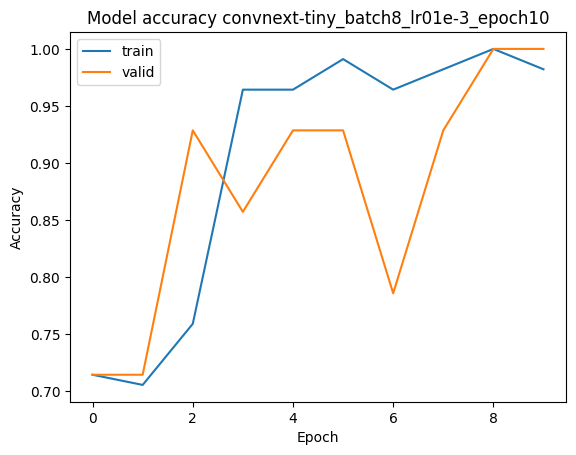

In [15]:
import warnings
warnings.filterwarnings("ignore")
from watermarkmodel.model.convnext import convnext_tiny

model_ft = convnext_tiny(pretrained=True, in_22k=True, num_classes=21841)

#config
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.AdamW(params=model_ft.parameters(), lr=0.1e-3)
BATCH_SIZE = 8
dataloaders_dict = {
    x: torch.utils.data.DataLoader(datasets[x], batch_size=BATCH_SIZE, shuffle=True, num_workers=0) #to prevent runtimeerror on non gpu device
    for x in ['train', 'val']
    }

#train
model_ft.head = nn.Sequential( 
    nn.Linear(in_features=768, out_features=512),
    nn.GELU(),
    nn.Linear(in_features=512, out_features=256),
    nn.GELU(),
    nn.Linear(in_features=256, out_features=2),
)

model_ft, train_acc_history, val_acc_history = train_model(
    model_ft, dataloaders_dict, criterion, optimizer, num_epochs=10
)

torch.save(model_ft.state_dict(), '../watermarkmodel/model/weights/convnext-tiny_watermarks_detector_datav1_batch8_lr01e-3_epoch10.pth')
plt.plot([i.cpu().item() for i in train_acc_history])
plt.plot([i.cpu().item() for i in val_acc_history])
plt.title('Model accuracy convnext-tiny_batch8_lr01e-3_epoch10')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

* pretrained_batch16_lr01e-3_epoch10

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from watermarkmodel.model.convnext import convnext_tiny

model_ft = convnext_tiny(pretrained=True, in_22k=True, num_classes=21841)

#config
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.AdamW(params=model_ft.parameters(), lr=0.1e-3)
BATCH_SIZE = 16
dataloaders_dict = {
    x: torch.utils.data.DataLoader(datasets[x], batch_size=BATCH_SIZE, shuffle=True, num_workers=0) #to prevent runtimeerror on non gpu device
    for x in ['train', 'val']
    }

#train
model_ft.head = nn.Sequential( 
    nn.Linear(in_features=768, out_features=512),
    nn.GELU(),
    nn.Linear(in_features=512, out_features=256),
    nn.GELU(),
    nn.Linear(in_features=256, out_features=2),
)

model_ft, train_acc_history, val_acc_history = train_model(
    model_ft, dataloaders_dict, criterion, optimizer, num_epochs=10
)

Epoch 0/4
----------


100%|██████████| 7/7 [01:16<00:00, 10.98s/it]


train Loss: 0.6260 Acc: 0.7143


100%|██████████| 1/1 [00:01<00:00,  1.75s/it]


val Loss: 0.6445 Acc: 0.6429

Epoch 1/4
----------


100%|██████████| 7/7 [01:03<00:00,  9.11s/it]


train Loss: 0.5584 Acc: 0.7232


100%|██████████| 1/1 [00:02<00:00,  2.29s/it]


val Loss: 0.6208 Acc: 0.6429

Epoch 2/4
----------


100%|██████████| 7/7 [01:23<00:00, 11.96s/it]


train Loss: 0.4671 Acc: 0.7232


100%|██████████| 1/1 [00:02<00:00,  2.12s/it]


val Loss: 0.4854 Acc: 0.6429

Epoch 3/4
----------


100%|██████████| 7/7 [01:13<00:00, 10.53s/it]


train Loss: 0.3782 Acc: 0.7321


100%|██████████| 1/1 [00:01<00:00,  1.56s/it]


val Loss: 0.3642 Acc: 0.7143

Epoch 4/4
----------


100%|██████████| 7/7 [01:25<00:00, 12.20s/it]


train Loss: 0.3076 Acc: 0.9196


100%|██████████| 1/1 [00:01<00:00,  1.70s/it]

val Loss: 0.3022 Acc: 0.8571

Training complete in 6m 33s
Best val Acc: 0.857143


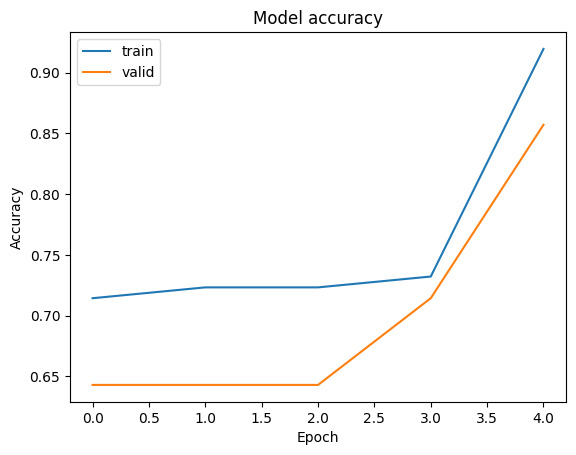

In [ ]:
torch.save(model_ft.state_dict(), '../watermarkmodel/model/weights/convnext-tiny_watermarks_detector_datav1_batch16_lr01e-3_epoch10.pth')
plt.plot([i.cpu().item() for i in train_acc_history])
plt.plot([i.cpu().item() for i in val_acc_history])
plt.title('Model accuracy convnext-tiny_batch16_lr01e-3_epoch10')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

* pretrained_batch32_lr01e-3_epoch10

In [51]:
import warnings
warnings.filterwarnings("ignore")
from watermarkmodel.model.convnext import convnext_tiny

model_ft = convnext_tiny(pretrained=True, in_22k=True, num_classes=21841)

#config
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.AdamW(params=model_ft.parameters(), lr=0.1e-3)
BATCH_SIZE = 32
dataloaders_dict = {
    x: torch.utils.data.DataLoader(datasets[x], batch_size=BATCH_SIZE, shuffle=True, num_workers=0) #to prevent runtimeerror on non gpu device
    for x in ['train', 'val']
    }

#train
model_ft.head = nn.Sequential( 
    nn.Linear(in_features=768, out_features=512),
    nn.GELU(),
    nn.Linear(in_features=512, out_features=256),
    nn.GELU(),
    nn.Linear(in_features=256, out_features=2),
)

model_ft, train_acc_history, val_acc_history = train_model(
    model_ft, dataloaders_dict, criterion, optimizer, num_epochs=10
)

Epoch 0/9
----------


100%|██████████| 4/4 [02:16<00:00, 34.03s/it]


train Loss: 0.6680 Acc: 0.6429


100%|██████████| 1/1 [00:09<00:00,  9.61s/it]


val Loss: 0.6578 Acc: 0.6429

Epoch 1/9
----------


100%|██████████| 4/4 [04:53<00:00, 73.29s/it] 


train Loss: 0.5902 Acc: 0.7232


100%|██████████| 1/1 [00:02<00:00,  2.41s/it]


val Loss: 0.6654 Acc: 0.6429

Epoch 2/9
----------


100%|██████████| 4/4 [03:51<00:00, 57.90s/it]


train Loss: 0.5453 Acc: 0.7232


100%|██████████| 1/1 [00:03<00:00,  3.16s/it]


val Loss: 0.5818 Acc: 0.6429

Epoch 3/9
----------


100%|██████████| 4/4 [03:25<00:00, 51.44s/it]


train Loss: 0.4739 Acc: 0.7232


100%|██████████| 1/1 [00:01<00:00,  1.92s/it]


val Loss: 0.5220 Acc: 0.6429

Epoch 4/9
----------


100%|██████████| 4/4 [01:48<00:00, 27.09s/it]


train Loss: 0.3975 Acc: 0.7232


100%|██████████| 1/1 [00:01<00:00,  1.80s/it]


val Loss: 0.4685 Acc: 0.6429

Epoch 5/9
----------


100%|██████████| 4/4 [01:53<00:00, 28.34s/it]


train Loss: 0.3409 Acc: 0.7321


100%|██████████| 1/1 [00:01<00:00,  1.82s/it]


val Loss: 0.3860 Acc: 0.7143

Epoch 6/9
----------


100%|██████████| 4/4 [04:26<00:00, 66.65s/it]


train Loss: 0.2866 Acc: 0.9286


100%|██████████| 1/1 [00:04<00:00,  4.46s/it]


val Loss: 0.3863 Acc: 0.9286

Epoch 7/9
----------


100%|██████████| 4/4 [03:50<00:00, 57.65s/it]


train Loss: 0.2472 Acc: 0.9821


100%|██████████| 1/1 [00:04<00:00,  4.03s/it]


val Loss: 0.2703 Acc: 0.9286

Epoch 8/9
----------


100%|██████████| 4/4 [03:23<00:00, 50.87s/it]


train Loss: 0.2289 Acc: 0.9732


100%|██████████| 1/1 [00:04<00:00,  4.63s/it]


val Loss: 0.2432 Acc: 1.0000

Epoch 9/9
----------


100%|██████████| 4/4 [02:33<00:00, 38.44s/it]


train Loss: 0.1797 Acc: 0.9911


100%|██████████| 1/1 [00:11<00:00, 11.77s/it]


val Loss: 0.2066 Acc: 1.0000

Training complete in 33m 9s
Best val Acc: 1.000000


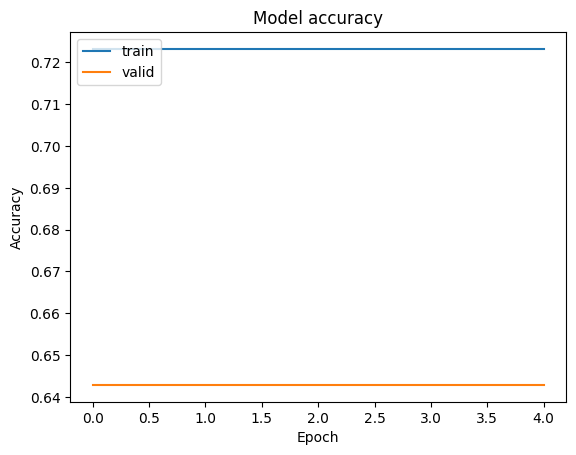

In [ ]:
torch.save(model_ft.state_dict(), '../watermarkmodel/model/weights/convnext-tiny_watermarks_detector_datav1_batch32_lr01e-3_epoch10.pth')
plt.plot([i.cpu().item() for i in train_acc_history])
plt.plot([i.cpu().item() for i in val_acc_history])
plt.title('Model accuracy convnext-tiny_batch32_lr01e-3_epoch10')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
#os.makedirs('../watermarkmodel/model/weights', exist_ok=True)
torch.save(model_ft.state_dict(), '../watermarkmodel/model/weights/convnext-tiny_watermarks_detector_datav1_batch16_lr01e-3_epoch10_.pth')
#"../watermarkmodel/model/weights/convnext-notpretrained-t_3layer-head_inp256_datasetv1_10epochs.pth")

**training with untrained convnext**

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from watermarkmodel.model.convnext import convnext_tiny

model_ft = convnext_tiny(pretrained=False, in_22k=True, num_classes=21841)

#config
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.AdamW(params=model_ft.parameters(), lr=0.1e-3)
BATCH_SIZE = 16
dataloaders_dict = {
    x: torch.utils.data.DataLoader(datasets[x], batch_size=BATCH_SIZE, shuffle=True, num_workers=0) #to prevent runtimeerror on non gpu device
    for x in ['train', 'val']
    }

model_ft.head = nn.Sequential( 
    nn.Linear(in_features=768, out_features=512),
    nn.GELU(),
    nn.Linear(in_features=512, out_features=256),
    nn.GELU(),
    nn.Linear(in_features=256, out_features=2),
)

model_ft, train_acc_history, val_acc_history = train_model(
    model_ft, dataloaders_dict, criterion, optimizer, num_epochs=10
)

Epoch 0/4
----------


100%|██████████| 7/7 [01:18<00:00, 11.19s/it]


train Loss: 0.6265 Acc: 0.6071


100%|██████████| 1/1 [00:01<00:00,  1.55s/it]


val Loss: 0.6402 Acc: 0.5714

Epoch 1/4
----------


100%|██████████| 7/7 [01:06<00:00,  9.54s/it]


train Loss: 0.5877 Acc: 0.7232


100%|██████████| 1/1 [00:01<00:00,  1.71s/it]


val Loss: 0.6490 Acc: 0.5714

Epoch 2/4
----------


100%|██████████| 7/7 [00:57<00:00,  8.21s/it]


train Loss: 0.5707 Acc: 0.7321


100%|██████████| 1/1 [00:01<00:00,  1.56s/it]


val Loss: 0.6605 Acc: 0.5714

Epoch 3/4
----------


100%|██████████| 7/7 [00:52<00:00,  7.51s/it]


train Loss: 0.5621 Acc: 0.7321


100%|██████████| 1/1 [00:01<00:00,  1.91s/it]


val Loss: 0.6604 Acc: 0.5714

Epoch 4/4
----------


100%|██████████| 7/7 [00:50<00:00,  7.26s/it]


train Loss: 0.5443 Acc: 0.7411


100%|██████████| 1/1 [00:01<00:00,  1.53s/it]

val Loss: 0.6804 Acc: 0.5714

Training complete in 5m 14s
Best val Acc: 0.571429


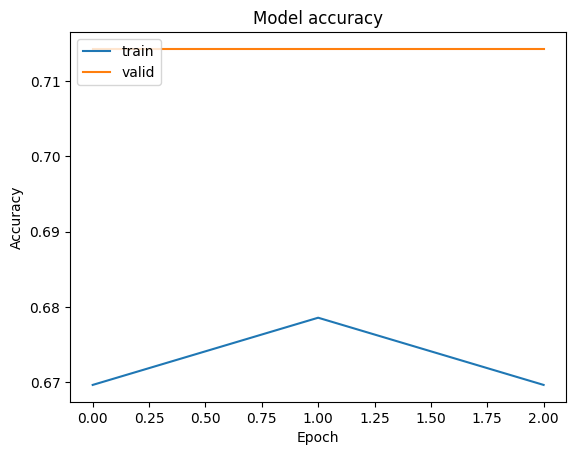

In [ ]:
plt.plot([i.cpu().item() for i in train_acc_history])
plt.plot([i.cpu().item() for i in val_acc_history])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'valid'], loc='upper left')
torch.save(model_ft.state_dict(), '../watermarkmodel/model/weights/convnext-tiny_watermarks_detector_data_v1_untrained.pth')
plt.show()

**training with resnet model**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

model_ft = models.resnext50_32x4d(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft, train_acc_history, val_acc_history = train_model(
    model_ft, dataloaders_dict, criterion, optimizer, num_epochs=10
)

Epoch 0/9
----------


100%|██████████| 2/2 [02:05<00:00, 62.54s/it]


train Loss: 0.6809 Acc: 0.6071


100%|██████████| 1/1 [00:02<00:00,  2.03s/it]


val Loss: 0.6360 Acc: 0.6429

Epoch 1/9
----------


100%|██████████| 2/2 [01:41<00:00, 50.56s/it]


train Loss: 0.6696 Acc: 0.5625


100%|██████████| 1/1 [00:01<00:00,  1.92s/it]


val Loss: 0.6361 Acc: 0.6429

Epoch 2/9
----------


100%|██████████| 2/2 [01:38<00:00, 49.30s/it]


train Loss: 0.6850 Acc: 0.5893


100%|██████████| 1/1 [00:01<00:00,  1.80s/it]


val Loss: 0.6360 Acc: 0.6429

Epoch 3/9
----------


100%|██████████| 2/2 [01:28<00:00, 44.26s/it]


train Loss: 0.6719 Acc: 0.5804


100%|██████████| 1/1 [00:01<00:00,  1.76s/it]


val Loss: 0.6370 Acc: 0.6429

Epoch 4/9
----------


100%|██████████| 2/2 [01:30<00:00, 45.15s/it]


train Loss: 0.6704 Acc: 0.6071


100%|██████████| 1/1 [00:02<00:00,  2.02s/it]


val Loss: 0.6400 Acc: 0.6429

Epoch 5/9
----------


100%|██████████| 2/2 [01:43<00:00, 51.89s/it]


train Loss: 0.6736 Acc: 0.6518


100%|██████████| 1/1 [00:01<00:00,  1.82s/it]


val Loss: 0.6442 Acc: 0.6429

Epoch 6/9
----------


100%|██████████| 2/2 [52:46<00:00, 1583.49s/it]


train Loss: 0.6750 Acc: 0.6339


100%|██████████| 1/1 [00:10<00:00, 10.52s/it]


val Loss: 0.6472 Acc: 0.7143

Epoch 7/9
----------


100%|██████████| 2/2 [03:10<00:00, 95.10s/it] 


train Loss: 0.6788 Acc: 0.5536


100%|██████████| 1/1 [00:02<00:00,  2.72s/it]


val Loss: 0.6497 Acc: 0.7143

Epoch 8/9
----------


100%|██████████| 2/2 [33:15<00:00, 997.76s/it] 


train Loss: 0.6735 Acc: 0.5446


100%|██████████| 1/1 [00:03<00:00,  3.43s/it]


val Loss: 0.6507 Acc: 0.7143

Epoch 9/9
----------


100%|██████████| 2/2 [02:17<00:00, 68.80s/it]


train Loss: 0.6638 Acc: 0.6518


100%|██████████| 1/1 [00:03<00:00,  3.14s/it]

val Loss: 0.6535 Acc: 0.7143

Training complete in 102m 10s
Best val Acc: 0.714286


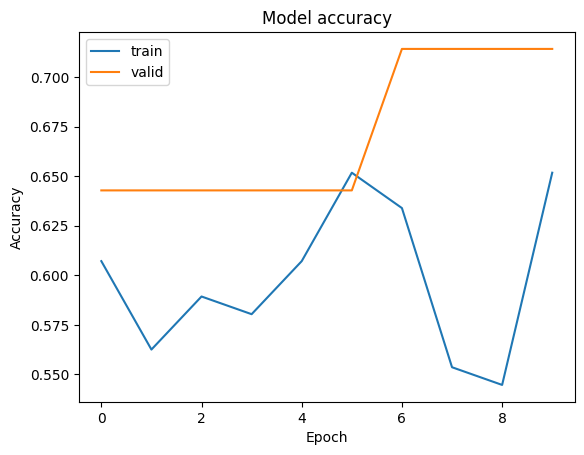

In [ ]:
plt.plot([i.cpu().item() for i in train_acc_history])
plt.plot([i.cpu().item() for i in val_acc_history])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
os.makedirs('../watermarkmodel/model/weights', exist_ok=True)
torch.save(model_ft.state_dict(), "../weights/resnext-t_3layer-head_inp256_datasetv1-1_10epochs_v3.pth")

## create model pickle from the best result **(pretrained_batch8_lr01e-3_epoch5)**

In [53]:
import pickle

#save model
filename = 'watermark_model.pkl'
pickle.dump(model1, open(filename, 'wb'))
print('done')

done


## model evaluation

**(pretrained_batch8_lr01e-3_epoch10)**

In [71]:
from PIL import Image
from watermarkmodel.utils import list_images
from watermarkmodel.model import get_convnext_model
from watermarkmodel.model.predictor import WatermarksPredictor
from watermarkmodel.model.metrics import plot_confusion_matrix

def evaluate_ml_model(picklefile, imagefolder):
    images = list_images('imagefolder') 
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    with open(picklefile, 'rb') as f_in:
        modelpkl = pickle.load(f_in)

    transforms = get_convnext_model('convnext-tiny')[1]
    predictor = WatermarksPredictor(modelpkl, transforms, device)
    result = predictor.run(images)

    df_testcsv = pd.read_csv('../dataset/test_data_v1.csv')
    df_testcsv['filename'] = df_testcsv['path'].apply(os.path.basename)

    df_testresult = pd.DataFrame(list(zip(images, result)), columns=['path', 'prediction'])
    df_testresult['filename'] = df_testresult['path'].apply(os.path.basename)

    df_result = df_testcsv.merge(df_testresult, left_on='filename', right_on='filename')[['filename', 'label', 'prediction']]
    accuracy = df_result[df_result.label == df_result.prediction]['filename'].count() / len(df_result) * 100

    #metric result
    confmatrix = plot_confusion_matrix(df_result['label'].values, df_result['prediction'].values)
    precision = confmatrix[1][0]
    recall = confmatrix[2][1]
    figures = confmatrix[0].figure_.savefig('confusion_matrix.png')

    return precision, recall, accuracy, figures

0it [00:00, ?it/s]/Users/atsiri/.pyenv/versions/3.9.13/lib/python3.9/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/Users/atsiri/.pyenv/versions/3.9.13/lib/python3.9/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/Users/atsiri/.pyenv/versions/3.9.13/lib/python3.9/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/Users/atsiri/.pyenv/versions/3.9.13/lib/python3.9/site-packages/timm/models/layer

ValueError: zero-size array to reduction operation maximum which has no identity

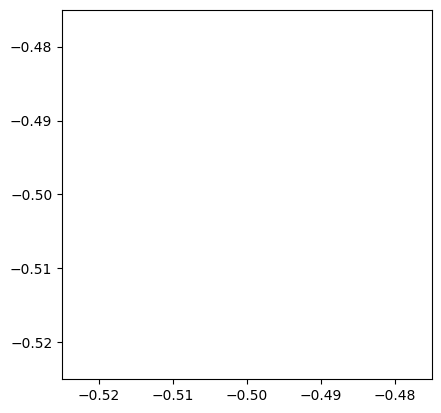

In [72]:
precision, recall, accuracy, figures = evaluate_ml_model('watermark_model.pkl', '../images/test_images/')
print('precision:', precision)
print('recall:', recall)
print('accuracy', accuracy)

In [ ]:
figures.figure_.savefig('confusion_matrix.png')

In [54]:
import warnings
warnings.filterwarnings("ignore")
from PIL import Image
from watermarkmodel.utils import list_images
from watermarkmodel.model import get_convnext_model
from watermarkmodel.model.predictor import WatermarksPredictor
import pandas as pd
import pickle

#validation data
images = list_images('../images/test_images/') 

pkl_filename = "watermark_model.pkl"
with open(pkl_filename, 'rb') as f_in:
    modelpkl = pickle.load(f_in)

transforms = get_convnext_model('convnext-tiny')[1]
predictor = WatermarksPredictor(modelpkl, transforms, 'cpu')
result = predictor.run(images)
#result
print('done')

  0%|          | 0/2 [00:00<?, ?it/s]/Users/atsiri/.pyenv/versions/3.9.13/lib/python3.9/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/Users/atsiri/.pyenv/versions/3.9.13/lib/python3.9/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/Users/atsiri/.pyenv/versions/3.9.13/lib/python3.9/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/Users/atsiri/.pyenv/versions/3.9.13/lib/python3.9/site-package

done


In [55]:
df_testcsv = pd.read_csv('../dataset/test_data_v1.csv')
df_testcsv['filename'] = df_testcsv['path'].apply(os.path.basename)

df_testresult = pd.DataFrame(list(zip(images, result)), columns=['path', 'prediction'])
df_testresult['filename'] = df_testresult['path'].apply(os.path.basename)

df_result = df_testcsv.merge(df_testresult, left_on='filename', right_on='filename')[['filename', 'label', 'prediction']]
accuracy = df_result[df_result.label == df_result.prediction]['filename'].count() / len(df_result) * 100
print('accuracy :', accuracy, '%') 

#rename label
df_result

accuracy : 86.66666666666667 %


,filename,label,prediction
0,DuVNMUdGvUdXeUHu.jpg,0,1
1,X8rMOlzQ5VhObWBA.jpg,0,0
2,wF36fOb5YWatHBJk.jpg,0,0
3,L4y4OQDGkz3m05im.jpg,1,1
4,DVHJaVOChW1VeEjx.jpg,0,0
5,sdnWkimhMDNOzR4r.jpg,0,0
6,fnnKTFUx36makePy.jpg,0,0
7,zwiv9icUoyXjZ3zv.jpg,1,1
8,CnJAPSZ7zrR3Sqxv.jpg,0,0
9,uU50iJIBiV1h40Pq.jpg,0,0


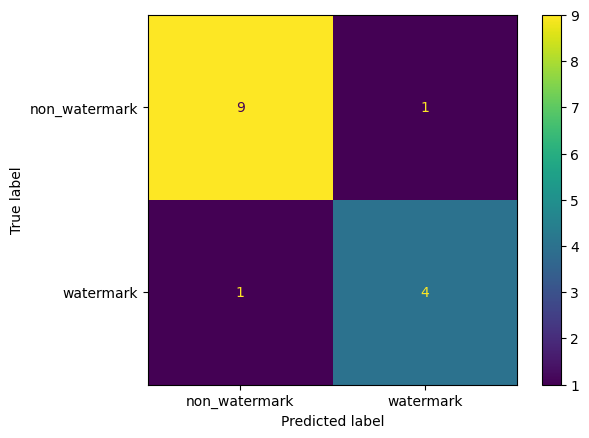

In [57]:
from watermarkmodel.model.metrics import plot_confusion_matrix

confmatrix = plot_confusion_matrix(df_result['label'].values, df_result['prediction'].values)
#print('- precision: ', confmatrix[1][0], '\n- recall:', confmatrix[2][1])
confmatrix[0].figure_.savefig('confusion_matrix.png')

In [67]:
confmatrix[2][1]

0.8

In [68]:
confmatrix[1][0]

0.9

In [66]:
confmatrix

(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1538e60a0>,
 array([0.9, 0.8]),
 array([0.9, 0.8]))